# **Library**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv (r'/content/crx.csv', header=None, na_values=['N/A', '?', 'xx', 'missing','x'])

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# **Exploring**

In [ ]:
df.isna().sum()

0     12
1     12
2      0
3      6
4      6
5     47
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       643 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [ ]:
df.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


# **Quantitative data**

In [ ]:
sns.set_theme()

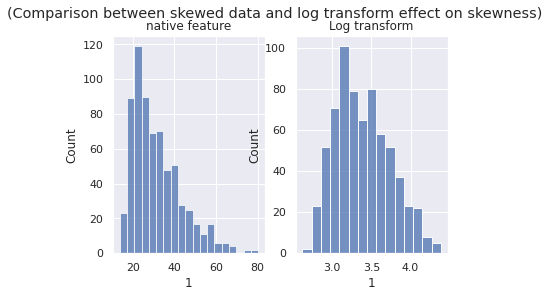

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('(Comparison between skewed data and log transform effect on skewness)')
axes[0].set_title('native feature')
sns.histplot(ax = axes[0], x=df[1])
axes[1].set_title('Log transform')
sns.histplot(ax = axes[1], x=np.log(df[1]))

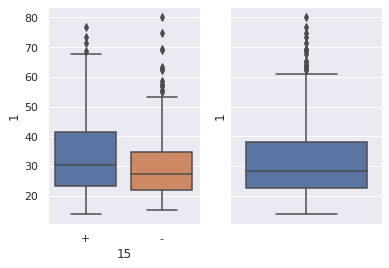

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[1], x=df[15])
sns.boxplot(ax= axes[1], y=df[1])

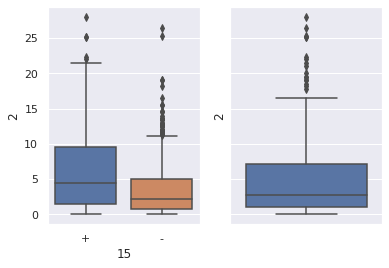

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[2], x=df[15])
sns.boxplot(ax= axes[1], y=df[2])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


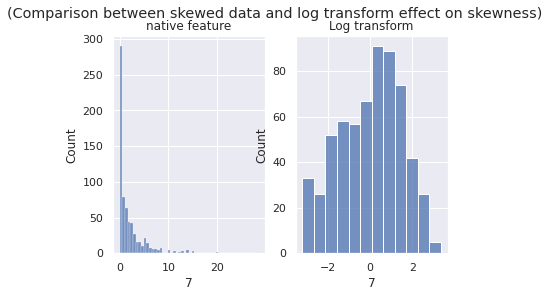

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('(Comparison between skewed data and log transform effect on skewness)')
axes[0].set_title('native feature')
sns.histplot(ax = axes[0], x=df[7])
axes[1].set_title('Log transform')
sns.histplot(ax = axes[1], x=np.log(df[7]))

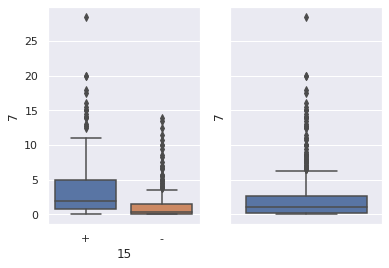

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[7], x=df[15])
sns.boxplot(ax= axes[1], y=df[7])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


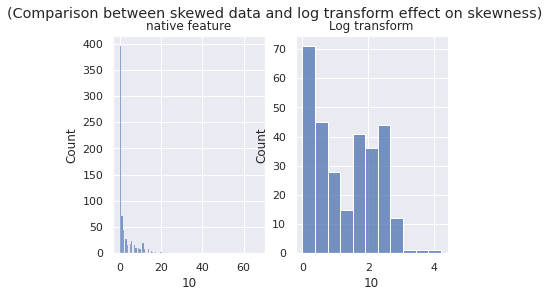

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('(Comparison between skewed data and log transform effect on skewness)')
axes[0].set_title('native feature')
sns.histplot(ax = axes[0], x=df[10])
axes[1].set_title('Log transform')
sns.histplot(ax = axes[1], x=np.log(df[10]))

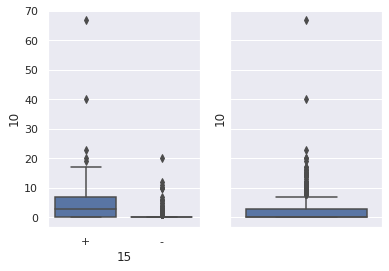

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[10], x=df[15])
sns.boxplot(ax= axes[1], y=df[10])

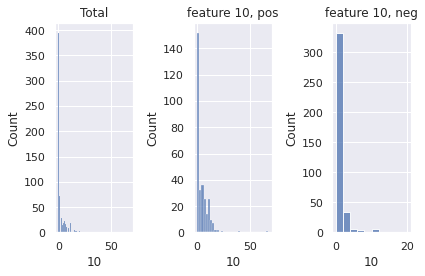

In [ ]:
fig, axes = plt.subplots(1, 3, sharey=False)
axes[0].set_title('Total')
sns.histplot(ax= axes[0], x=df[10])
axes[1].set_title('feature 10, pos')
sns.histplot(ax= axes[1], x=df.loc[df[15] == '+', 10])
axes[2].set_title('feature 10, neg')
sns.histplot(ax= axes[2], x=df.loc[df[15] == '-', 10])
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


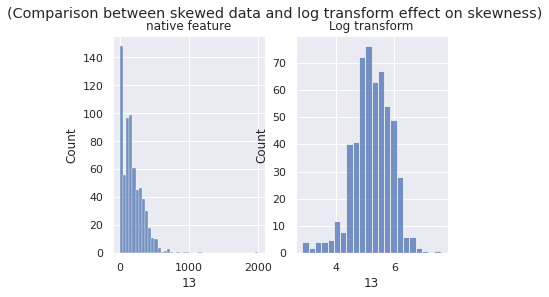

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('(Comparison between skewed data and log transform effect on skewness)')
axes[0].set_title('native feature')
sns.histplot(ax = axes[0], x=df[13])
axes[1].set_title('Log transform')
sns.histplot(ax = axes[1], x=np.log(df[13]))

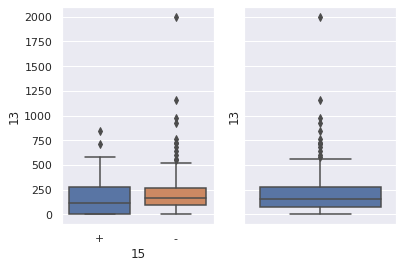

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[13], x=df[15])
sns.boxplot(ax= axes[1], y=df[13])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


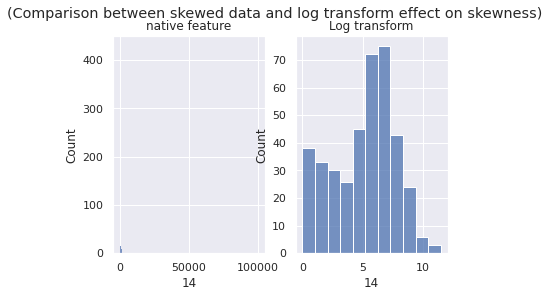

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('(Comparison between skewed data and log transform effect on skewness)')
axes[0].set_title('native feature')
sns.histplot(ax = axes[0], x=df[14])
axes[1].set_title('Log transform')
sns.histplot(ax = axes[1], x=np.log(df[14]))

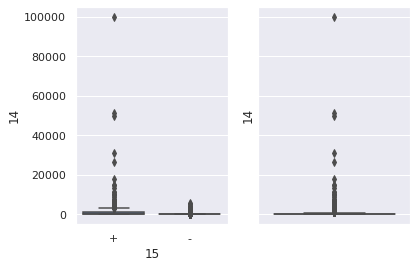

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot(ax= axes[0], y=df[14], x=df[15])
sns.boxplot(ax= axes[1], y=df[14])

In [ ]:
df.corr()

,1,2,7,10,13,14
1,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
2,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
7,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
10,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
13,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
14,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


# **Qualitative data**

In [ ]:
df[0].value_counts()

b    468
a    210
Name: 0, dtype: int64

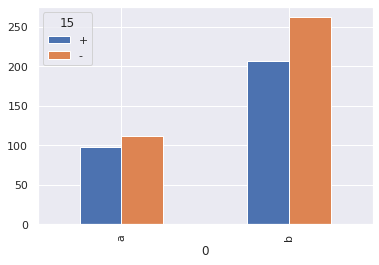

In [ ]:
CrosstabResult=pd.crosstab(index=df[0],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[3].value_counts()

u    519
y    163
l      2
Name: 3, dtype: int64

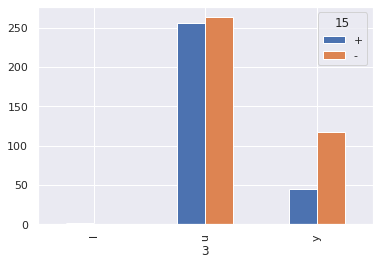

In [ ]:
CrosstabResult=pd.crosstab(index=df[3],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[4].value_counts()

g     519
p     163
gg      2
Name: 4, dtype: int64

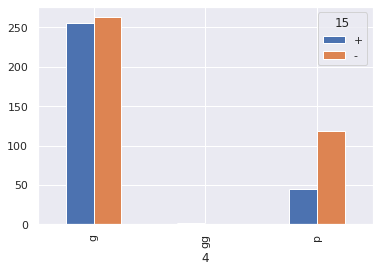

In [ ]:
CrosstabResult=pd.crosstab(index=df[4],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[5].value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
d      30
e      25
j      10
r       3
Name: 5, dtype: int64

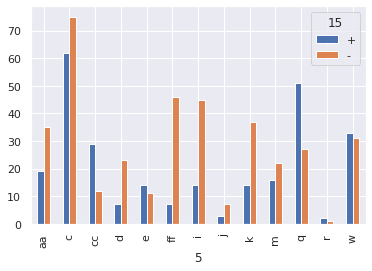

In [ ]:
CrosstabResult=pd.crosstab(index=df[5],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[6].value_counts()

v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: 6, dtype: int64

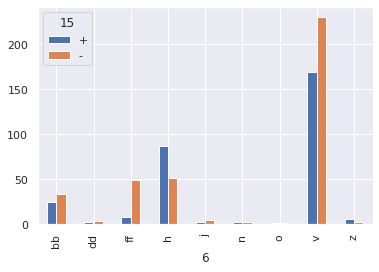

In [ ]:
CrosstabResult=pd.crosstab(index=df[6],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[8].value_counts()

t    361
f    329
Name: 8, dtype: int64

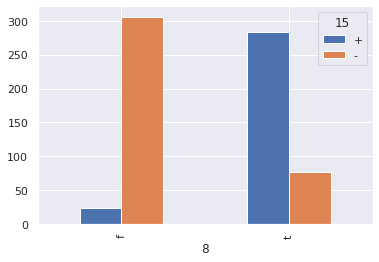

In [ ]:
CrosstabResult=pd.crosstab(index=df[8],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[9].value_counts()

f    395
t    295
Name: 9, dtype: int64

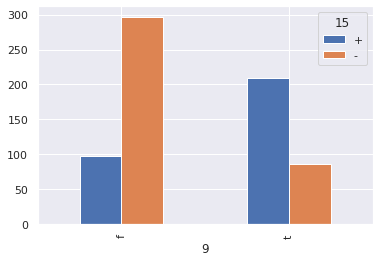

In [ ]:
CrosstabResult=pd.crosstab(index=df[9],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[11].value_counts()

f    374
t    316
Name: 11, dtype: int64

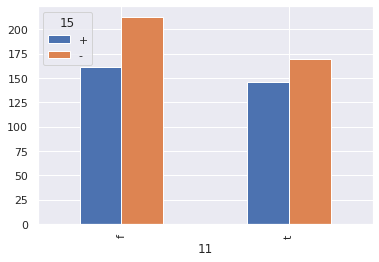

In [ ]:
CrosstabResult=pd.crosstab(index=df[11],columns=df[15])
CrosstabResult.plot.bar()

In [ ]:
df[12].value_counts()

g    625
s     57
p      8
Name: 12, dtype: int64

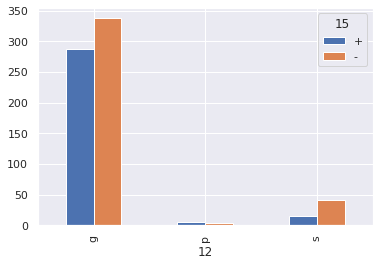

In [ ]:
CrosstabResult=pd.crosstab(index=df[12],columns=df[15])
CrosstabResult.plot.bar()

# **Cont. features**

In [ ]:
CONT_FEATURES = [1,	2,	7,	10, 13, 14]

In [ ]:
df[CONT_FEATURES]

,1,2,7,10,13,14
0,30.83,0.000,1.25,1,202.0,0
1,58.67,4.460,3.04,6,43.0,560
2,24.50,0.500,1.50,0,280.0,824
3,27.83,1.540,3.75,5,100.0,3
4,20.17,5.625,1.71,0,120.0,0
...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0
686,22.67,0.750,2.00,2,200.0,394
687,25.25,13.500,2.00,1,200.0,1
688,17.92,0.205,0.04,0,280.0,750


In [ ]:
df_log_cont = df.apply(lambda x: np.log(x + np.finfo(float).eps) if x.name in CONT_FEATURES else x)

In [ ]:
df_log_cont

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,3.428488,-36.043653,u,g,w,v,0.223144,t,t,2.220446e-16,f,g,5.308268,-3.604365e+01,+
1,a,4.071929,1.495149,u,g,q,h,1.111858,t,t,1.791759e+00,f,g,3.761200,6.327937e+00,+
2,a,3.198673,-0.693147,u,g,q,h,0.405465,t,f,-3.604365e+01,f,g,5.634790,6.714171e+00,+
3,b,3.326115,0.431782,u,g,w,v,1.321756,t,t,1.609438e+00,t,g,4.605170,1.098612e+00,+
4,b,3.004196,1.727221,u,g,w,v,0.536493,t,f,-3.604365e+01,f,s,4.787492,-3.604365e+01,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,3.048325,2.311049,y,p,e,h,0.223144,f,f,-3.604365e+01,f,g,5.560682,-3.604365e+01,-
686,a,3.121042,-0.287682,u,g,c,v,0.693147,f,t,6.931472e-01,t,g,5.298317,5.976351e+00,-
687,a,3.228826,2.602690,y,p,ff,ff,0.693147,f,t,2.220446e-16,t,g,5.298317,2.220446e-16,-
688,b,2.885917,-1.584745,u,g,aa,v,-3.218876,f,f,-3.604365e+01,f,g,5.634790,6.620073e+00,-


# **Disc. features**

In [ ]:
DISC_FEATURES = [0, 3, 4, 5, 6, 8, 9, 11, 12]
BINARY_DISC_FEATURES = [0, 8, 9, 11]
label = 15

In [ ]:
df_dic_only = pd.get_dummies(df_log_cont.loc[:, DISC_FEATURES], dummy_na=True)

In [ ]:
df_dic_only

,0_a,0_b,0_nan,3_l,3_u,3_y,3_nan,4_g,4_gg,4_p,...,9_f,9_t,9_nan,11_f,11_t,11_nan,12_g,12_p,12_s,12_nan
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
686,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
687,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
688,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
nan_df = df_dic_only.loc[:, df_dic_only.columns.str.endswith("_nan")]

In [ ]:
nan_df

,0_nan,3_nan,4_nan,5_nan,6_nan,8_nan,9_nan,11_nan,12_nan
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
685,0,0,0,0,0,0,0,0,0
686,0,0,0,0,0,0,0,0,0
687,0,0,0,0,0,0,0,0,0
688,0,0,0,0,0,0,0,0,0


In [ ]:
for index in df_dic_only.index:
    for col_nan in nan_df.columns:
        if df_dic_only.loc[index,col_nan] == 1:
            col_id = col_nan.split('_')[0]
            targets = df_dic_only.columns[df_dic_only.columns.str.startswith(col_id+'_')]
            df_dic_only.loc[index, targets] = np.nan

In [ ]:
df_dic_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0_a     678 non-null    float64
 1   0_b     678 non-null    float64
 2   0_nan   678 non-null    float64
 3   3_l     684 non-null    float64
 4   3_u     684 non-null    float64
 5   3_y     684 non-null    float64
 6   3_nan   684 non-null    float64
 7   4_g     684 non-null    float64
 8   4_gg    684 non-null    float64
 9   4_p     684 non-null    float64
 10  4_nan   684 non-null    float64
 11  5_aa    643 non-null    float64
 12  5_c     643 non-null    float64
 13  5_cc    643 non-null    float64
 14  5_d     643 non-null    float64
 15  5_e     643 non-null    float64
 16  5_ff    643 non-null    float64
 17  5_i     643 non-null    float64
 18  5_j     643 non-null    float64
 19  5_k     643 non-null    float64
 20  5_m     643 non-null    float64
 21  5_q     643 non-null    float64
 22  5_

In [ ]:
df_dic_only.drop(df_dic_only.columns[df_dic_only.columns.str.endswith('_nan')], axis=1, inplace=True)


In [ ]:
df_dic_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0_a     678 non-null    float64
 1   0_b     678 non-null    float64
 2   3_l     684 non-null    float64
 3   3_u     684 non-null    float64
 4   3_y     684 non-null    float64
 5   4_g     684 non-null    float64
 6   4_gg    684 non-null    float64
 7   4_p     684 non-null    float64
 8   5_aa    643 non-null    float64
 9   5_c     643 non-null    float64
 10  5_cc    643 non-null    float64
 11  5_d     643 non-null    float64
 12  5_e     643 non-null    float64
 13  5_ff    643 non-null    float64
 14  5_i     643 non-null    float64
 15  5_j     643 non-null    float64
 16  5_k     643 non-null    float64
 17  5_m     643 non-null    float64
 18  5_q     643 non-null    float64
 19  5_r     643 non-null    float64
 20  5_w     643 non-null    float64
 21  6_bb    681 non-null    float64
 22  6_

In [ ]:
df_log_cont

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,3.428488,-36.043653,u,g,w,v,0.223144,t,t,2.220446e-16,f,g,5.308268,-3.604365e+01,+
1,a,4.071929,1.495149,u,g,q,h,1.111858,t,t,1.791759e+00,f,g,3.761200,6.327937e+00,+
2,a,3.198673,-0.693147,u,g,q,h,0.405465,t,f,-3.604365e+01,f,g,5.634790,6.714171e+00,+
3,b,3.326115,0.431782,u,g,w,v,1.321756,t,t,1.609438e+00,t,g,4.605170,1.098612e+00,+
4,b,3.004196,1.727221,u,g,w,v,0.536493,t,f,-3.604365e+01,f,s,4.787492,-3.604365e+01,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,3.048325,2.311049,y,p,e,h,0.223144,f,f,-3.604365e+01,f,g,5.560682,-3.604365e+01,-
686,a,3.121042,-0.287682,u,g,c,v,0.693147,f,t,6.931472e-01,t,g,5.298317,5.976351e+00,-
687,a,3.228826,2.602690,y,p,ff,ff,0.693147,f,t,2.220446e-16,t,g,5.298317,2.220446e-16,-
688,b,2.885917,-1.584745,u,g,aa,v,-3.218876,f,f,-3.604365e+01,f,g,5.634790,6.620073e+00,-


In [ ]:
df_log_cont = pd.concat([df_log_cont, df_dic_only], axis=1)

In [ ]:
df_log_cont

,0,1,2,3,4,5,6,7,8,9,...,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,b,3.428488,-36.043653,u,g,w,v,0.223144,t,t,...,0.0,0,1,0,1,1,0,1,0,0
1,a,4.071929,1.495149,u,g,q,h,1.111858,t,t,...,0.0,0,1,0,1,1,0,1,0,0
2,a,3.198673,-0.693147,u,g,q,h,0.405465,t,f,...,0.0,0,1,1,0,1,0,1,0,0
3,b,3.326115,0.431782,u,g,w,v,1.321756,t,t,...,0.0,0,1,0,1,0,1,1,0,0
4,b,3.004196,1.727221,u,g,w,v,0.536493,t,f,...,0.0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,3.048325,2.311049,y,p,e,h,0.223144,f,f,...,0.0,1,0,1,0,1,0,1,0,0
686,a,3.121042,-0.287682,u,g,c,v,0.693147,f,t,...,0.0,1,0,0,1,0,1,1,0,0
687,a,3.228826,2.602690,y,p,ff,ff,0.693147,f,t,...,0.0,1,0,0,1,0,1,1,0,0
688,b,2.885917,-1.584745,u,g,aa,v,-3.218876,f,f,...,0.0,1,0,1,0,1,0,1,0,0


In [ ]:
df_log_cont = pd.concat([df_log_cont, pd.get_dummies(df_log_cont[15]).iloc[:,0]], axis=1)

In [ ]:
df_log_cont

,0,1,2,3,4,5,6,7,8,9,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,+
0,b,3.428488,-36.043653,u,g,w,v,0.223144,t,t,...,0,1,0,1,1,0,1,0,0,1
1,a,4.071929,1.495149,u,g,q,h,1.111858,t,t,...,0,1,0,1,1,0,1,0,0,1
2,a,3.198673,-0.693147,u,g,q,h,0.405465,t,f,...,0,1,1,0,1,0,1,0,0,1
3,b,3.326115,0.431782,u,g,w,v,1.321756,t,t,...,0,1,0,1,0,1,1,0,0,1
4,b,3.004196,1.727221,u,g,w,v,0.536493,t,f,...,0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,3.048325,2.311049,y,p,e,h,0.223144,f,f,...,1,0,1,0,1,0,1,0,0,0
686,a,3.121042,-0.287682,u,g,c,v,0.693147,f,t,...,1,0,0,1,0,1,1,0,0,0
687,a,3.228826,2.602690,y,p,ff,ff,0.693147,f,t,...,1,0,0,1,0,1,1,0,0,0
688,b,2.885917,-1.584745,u,g,aa,v,-3.218876,f,f,...,1,0,1,0,1,0,1,0,0,0


In [ ]:
df_log_cont.drop(DISC_FEATURES, axis=1, inplace=True)

In [ ]:
df_log_cont.drop(15, axis=1, inplace=True)

In [ ]:
df_log_cont

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,+
0,3.428488,-36.043653,0.223144,2.220446e-16,5.308268,-3.604365e+01,0.0,1.0,0.0,1.0,...,0,1,0,1,1,0,1,0,0,1
1,4.071929,1.495149,1.111858,1.791759e+00,3.761200,6.327937e+00,1.0,0.0,0.0,1.0,...,0,1,0,1,1,0,1,0,0,1
2,3.198673,-0.693147,0.405465,-3.604365e+01,5.634790,6.714171e+00,1.0,0.0,0.0,1.0,...,0,1,1,0,1,0,1,0,0,1
3,3.326115,0.431782,1.321756,1.609438e+00,4.605170,1.098612e+00,0.0,1.0,0.0,1.0,...,0,1,0,1,0,1,1,0,0,1
4,3.004196,1.727221,0.536493,-3.604365e+01,4.787492,-3.604365e+01,0.0,1.0,0.0,1.0,...,0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,3.048325,2.311049,0.223144,-3.604365e+01,5.560682,-3.604365e+01,0.0,1.0,0.0,0.0,...,1,0,1,0,1,0,1,0,0,0
686,3.121042,-0.287682,0.693147,6.931472e-01,5.298317,5.976351e+00,1.0,0.0,0.0,1.0,...,1,0,0,1,0,1,1,0,0,0
687,3.228826,2.602690,0.693147,2.220446e-16,5.298317,2.220446e-16,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,0,0,0
688,2.885917,-1.584745,-3.218876,-3.604365e+01,5.634790,6.620073e+00,0.0,1.0,0.0,1.0,...,1,0,1,0,1,0,1,0,0,0


In [ ]:
df_log_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       678 non-null    float64
 1   2       690 non-null    float64
 2   7       690 non-null    float64
 3   10      690 non-null    float64
 4   13      677 non-null    float64
 5   14      690 non-null    float64
 6   0_a     678 non-null    float64
 7   0_b     678 non-null    float64
 8   3_l     684 non-null    float64
 9   3_u     684 non-null    float64
 10  3_y     684 non-null    float64
 11  4_g     684 non-null    float64
 12  4_gg    684 non-null    float64
 13  4_p     684 non-null    float64
 14  5_aa    643 non-null    float64
 15  5_c     643 non-null    float64
 16  5_cc    643 non-null    float64
 17  5_d     643 non-null    float64
 18  5_e     643 non-null    float64
 19  5_ff    643 non-null    float64
 20  5_i     643 non-null    float64
 21  5_j     643 non-null    float64
 22  5_

# **Impute the nan values**

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
df_log_cont = imputer.fit_transform(df_log_cont)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
df_log_cont.shape

(690, 46)

# **Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_log_cont[:,:-1], df_log_cont[:,-1], test_size=0.2, stratify=df_log_cont[:,-1], random_state=17)

In [ ]:
X_train.shape, X_test.shape

((552, 45), (138, 45))

# **Normalization**

In [ ]:
scalar = RobustScaler()

In [ ]:
X_train = scalar.fit_transform(X_train)

In [ ]:
X_test = scalar.transform(X_test)

# **Model**

In [ ]:
param_dist = {'n_estimators': np.arange(3, 20),
              'max_depth': np.arange(2, 20),
              'min_samples_split': np.arange(2, 20)}

In [ ]:
model = RandomForestClassifier(random_state=17)

In [ ]:
n_iter_search = 100
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring='accuracy', random_state=17)

In [ ]:
def report(results, n_top=6):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [ ]:
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 18.29 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.882 (std: 0.026)
Parameters: {'n_estimators': 15, 'min_samples_split': 9, 'max_depth': 16}

Model with rank: 2
Mean validation score: 0.880 (std: 0.016)
Parameters: {'n_estimators': 19, 'min_samples_split': 6, 'max_depth': 15}

Model with rank: 2
Mean validation score: 0.880 (std: 0.021)
Parameters: {'n_estimators': 14, 'min_samples_split': 5, 'max_depth': 6}

Model with rank: 4
Mean validation score: 0.880 (std: 0.018)
Parameters: {'n_estimators': 15, 'min_samples_split': 9, 'max_depth': 9}

Model with rank: 5
Mean validation score: 0.879 (std: 0.027)
Parameters: {'n_estimators': 16, 'min_samples_split': 5, 'max_depth': 2}

Model with rank: 6
Mean validation score: 0.879 (std: 0.007)
Parameters: {'n_estimators': 16, 'min_samples_split': 2, 'max_depth': 5}



In [ ]:
model_best = RandomForestClassifier(n_estimators= 17, min_samples_split= 15, max_depth= 13, random_state=17)

In [ ]:
model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_split=15, n_estimators=17,
                       random_state=17)

# **Model evaluation**

In [ ]:
def compute_classification_report(y_true, y_pred):
  target_names = ['No', 'Yes']
  print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

In [ ]:
y_pred_train = model_best.predict(X_train)
y_pred_test = model_best.predict(X_test)

In [ ]:
compute_classification_report(y_train, y_pred_train)

              precision    recall  f1-score   support

          No     0.9344    0.9314    0.9329       306
         Yes     0.9150    0.9187    0.9168       246

    accuracy                         0.9257       552
   macro avg     0.9247    0.9250    0.9249       552
weighted avg     0.9258    0.9257    0.9257       552



In [ ]:
compute_classification_report(y_test, y_pred_test)

              precision    recall  f1-score   support

          No     0.8806    0.7662    0.8194        77
         Yes     0.7465    0.8689    0.8030        61

    accuracy                         0.8116       138
   macro avg     0.8135    0.8175    0.8112       138
weighted avg     0.8213    0.8116    0.8122       138

